In [99]:
import pandas as pd

In [100]:
!ls ../CSVs/Fondeo2/

'25mar25_Whistle FONDEO2_verificado.csv'   Fondeo2_Whistles_Standardized.csv


In [101]:
# take list of csv files in ../CSVs/ and read them into a dictionary of dataframes
csv_files = !ls ../CSVs/Fondeo2/

In [102]:
VALIDATION = "Fondeo2"

In [ ]:
# df = pd.DataFrame()

# # Load file
# for file in csv_files:
#     df = pd.concat([df, pd.read_csv(f'../CSVs/{VALIDATION}/{file}')]) 

In [104]:
df = pd.read_csv(f'../CSVs/{VALIDATION}/25mar25_Whistle FONDEO2_verificado.csv')

In [105]:
df

,Idx,Specie,File,Validation,Suggested Specie,Comment
0,1,Whistle,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,1.0,NaN,NaN
1,2,Whistle,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,1.0,NaN,NaN
2,3,Whistle,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,1.0,NaN,NaN
3,4,Whistle,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,1.0,NaN,NaN
4,5,Whistle,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,1.0,NaN,NaN
...,...,...,...,...,...,...
150,151,Whistle,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,0.0,Ferry,Clicks de What y ferry
151,152,Whistle,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,0.0,Ferry,Clicks de What y ferry
152,153,Whistle,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,0.0,Ferry,Clicks de What y ferry
153,154,Whistle,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,0.0,Ferry,Clicks de What y ferry


In [106]:
df = df[df['Validation'] != -100]
# df = df[df['Validation'] != -1]
# df = df[df['Validation'] != -2]

In [107]:
# reset index
df = df.reset_index(drop=True)

In [108]:
# Change validation values to Correct if 1, Other specie if 0, Unknown if -2, Bird if 2
df['Validation_Val'] = df['Validation'].map({1: 'Correct', 0: 'Other', -2: 'Unknown', 2: 'Cetacean', -1: 'Incorrect'})

<Figure size 1200x800 with 0 Axes>

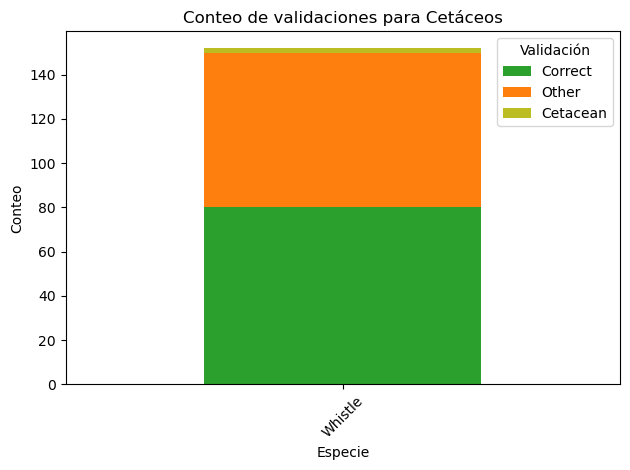

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame


# Green for Correct, Orange for Bird, Red for Other specie, Blue for Unknown
colors = {'Correct': 'C2', 'Cetacean': 'C8', 'Other': 'C1', 'Unknown': 'C0', "Incorrect:": "C3"}

# Group by 'Specie' and 'Validation' and count occurrences
grouped = df.groupby(['Specie', 'Validation_Val']).size().unstack(fill_value=0)

# Ensure the columns are in the correct order
grouped = grouped[['Correct', 'Other', 'Cetacean']]

# Plotting
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=True, color=[colors[val] for val in grouped.columns])
plt.title('Conteo de validaciones para Cetáceos')
plt.xlabel('Especie')
plt.ylabel('Conteo')
plt.legend(title='Validación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
df["Suggested Specie"].unique()

array(['Whistle'], dtype=object)

In [110]:
# If validation is correct, set the suggested specie is the same as the specie
df.loc[df['Validation'] == 1, 'Suggested Specie'] = df['Specie']
# if Validation is -2, set Suggested Specie to Cetacean
df.loc[df['Validation'] == 2, 'Suggested Specie'] = 'Cetacean'

In [86]:
# # Drop rows where Validation is Unknown and Bird in df
# print(len(df))

# df = df[df.Validation != 'Unknown']
# df = df[df.Validation != 'Bird']

# print(len(df))

In [111]:
# Reset the index to ensure unique labels
df = df.reset_index(drop=True)

df["SegmentFile"] = df["File"]
df["StartSecond"] = df["File"].str.split("_").str.get(-3)
df["EndSecond"] = df["File"].str.split("_").str.get(-2)
df["ConfidenceScore"] = df["File"].str.replace(".WAV","").str.split("_").str.get(-1)
# File = File split but last 4 elements separated by _
df["File"] = df["File"].str.split('_').str[:-4].str.join('_') + ".WAV"
df

,Idx,Specie,File,Validation,Suggested Specie,Comment,Validation_Val,SegmentFile,StartSecond,EndSecond,ConfidenceScore
0,1,Whistle,channelA_2024-05-27_21-43-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286,293,0.56
1,2,Whistle,channelA_2024-05-27_21-48-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0,5,0.98
2,3,Whistle,channelA_2024-05-27_21-48-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103,110,0.91
3,4,Whistle,channelA_2024-05-27_21-48-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106,113,0.98
4,5,Whistle,channelA_2024-05-27_21-48-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109,116,1.0
...,...,...,...,...,...,...,...,...,...,...,...
150,151,Whistle,channelA_2024-06-12_16-00-33.WAV,0.0,Ferry,Clicks de What y ferry,Other,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106,113,0.62
151,152,Whistle,channelA_2024-06-12_16-15-33.WAV,0.0,Ferry,Clicks de What y ferry,Other,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25,32,0.58
152,153,Whistle,channelA_2024-06-12_16-15-33.WAV,0.0,Ferry,Clicks de What y ferry,Other,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34,41,0.61
153,154,Whistle,channelA_2024-06-12_16-15-33.WAV,0.0,Ferry,Clicks de What y ferry,Other,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40,47,0.61


In [112]:
df

,Idx,Specie,File,Validation,Suggested Specie,Comment,Validation_Val,SegmentFile,StartSecond,EndSecond,ConfidenceScore
0,1,Whistle,channelA_2024-05-27_21-43-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286,293,0.56
1,2,Whistle,channelA_2024-05-27_21-48-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0,5,0.98
2,3,Whistle,channelA_2024-05-27_21-48-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103,110,0.91
3,4,Whistle,channelA_2024-05-27_21-48-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106,113,0.98
4,5,Whistle,channelA_2024-05-27_21-48-19.WAV,1.0,Whistle,NaN,Correct,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109,116,1.0
...,...,...,...,...,...,...,...,...,...,...,...
150,151,Whistle,channelA_2024-06-12_16-00-33.WAV,0.0,Ferry,Clicks de What y ferry,Other,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106,113,0.62
151,152,Whistle,channelA_2024-06-12_16-15-33.WAV,0.0,Ferry,Clicks de What y ferry,Other,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25,32,0.58
152,153,Whistle,channelA_2024-06-12_16-15-33.WAV,0.0,Ferry,Clicks de What y ferry,Other,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34,41,0.61
153,154,Whistle,channelA_2024-06-12_16-15-33.WAV,0.0,Ferry,Clicks de What y ferry,Other,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40,47,0.61


In [113]:
# Create column StartRecordingTimestamp from File (channelA_YYYY-MM-DD_HH-MM-SS.WAV)
df["StartRecordingTimestamp"] = df["File"].str.split('_').str.get(1) + " " + df["File"].str.split('_').str.get(2).str.replace(".WAV","")
df["StartRecordingTimestamp"] = pd.to_datetime(df["StartRecordingTimestamp"], format="%Y-%m-%d %H-%M-%S")

# Convert StartSecond and EndSecond to numeric values
df["StartSecond"] = pd.to_numeric(df["StartSecond"])
df["EndSecond"] = pd.to_numeric(df["EndSecond"])

# StartAnnotationTimestamp = StartRecordingTimestamp + StartSecond
df["StartAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["StartSecond"], unit='s')
# EndAnnotationTimestamp = StartRecordingTimestamp + EndSecond
df["EndAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["EndSecond"], unit='s')

# Order of columns: File, SegmentFile, StartSecond, EndSecond, StartRecordingTimestamp, StartAnnotationTimestamp, EndAnnotationTimestamp, Specie, Validation, Suggested Specie, ConfidenceScore
df = df[['File', 'SegmentFile', 'StartSecond', 'EndSecond', 'StartRecordingTimestamp', 'StartAnnotationTimestamp', 'EndAnnotationTimestamp', 'Specie', 'Validation', 'Suggested Specie', 'ConfidenceScore']]
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-05-27_21-43-19.WAV,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286.0,293.0,2024-05-27 21:43:19,2024-05-27 21:48:05,2024-05-27 21:48:12,Whistle,1.0,Whistle,0.56
1,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0.0,5.0,2024-05-27 21:48:19,2024-05-27 21:48:19,2024-05-27 21:48:24,Whistle,1.0,Whistle,0.98
2,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103.0,110.0,2024-05-27 21:48:19,2024-05-27 21:50:02,2024-05-27 21:50:09,Whistle,1.0,Whistle,0.91
3,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106.0,113.0,2024-05-27 21:48:19,2024-05-27 21:50:05,2024-05-27 21:50:12,Whistle,1.0,Whistle,0.98
4,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109.0,116.0,2024-05-27 21:48:19,2024-05-27 21:50:08,2024-05-27 21:50:15,Whistle,1.0,Whistle,1.0
...,...,...,...,...,...,...,...,...,...,...,...
150,channelA_2024-06-12_16-00-33.WAV,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106.0,113.0,2024-06-12 16:00:33,2024-06-12 16:02:19,2024-06-12 16:02:26,Whistle,0.0,Ferry,0.62
151,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25.0,32.0,2024-06-12 16:15:33,2024-06-12 16:15:58,2024-06-12 16:16:05,Whistle,0.0,Ferry,0.58
152,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34.0,41.0,2024-06-12 16:15:33,2024-06-12 16:16:07,2024-06-12 16:16:14,Whistle,0.0,Ferry,0.61
153,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40.0,47.0,2024-06-12 16:15:33,2024-06-12 16:16:13,2024-06-12 16:16:20,Whistle,0.0,Ferry,0.61


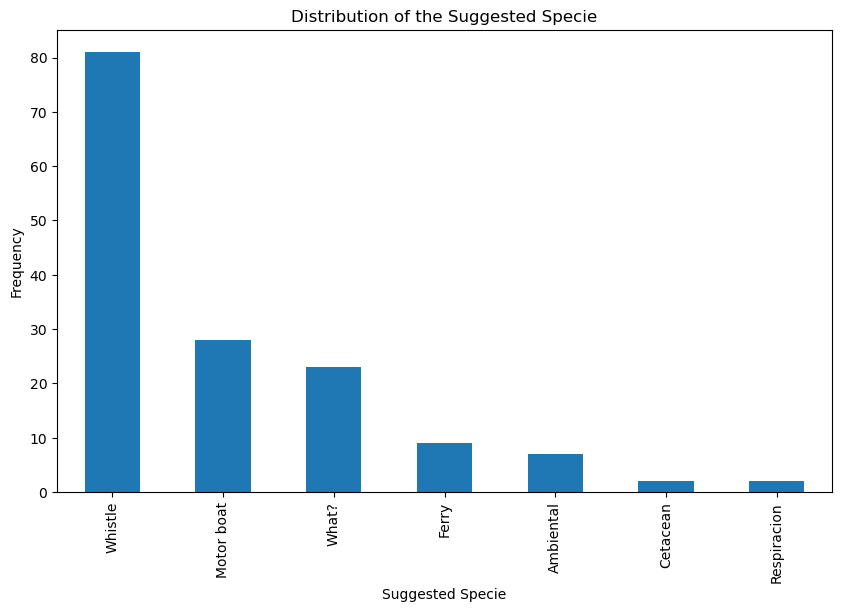

In [114]:
import matplotlib.pyplot as plt
# Distribution of the Altertative
plt.figure(figsize=(10, 6))
df['Suggested Specie'].value_counts().plot(kind='bar')
plt.xlabel('Suggested Specie')
plt.ylabel('Frequency')
plt.title('Distribution of the Suggested Specie')
plt.show()

In [115]:
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-05-27_21-43-19.WAV,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286.0,293.0,2024-05-27 21:43:19,2024-05-27 21:48:05,2024-05-27 21:48:12,Whistle,1.0,Whistle,0.56
1,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0.0,5.0,2024-05-27 21:48:19,2024-05-27 21:48:19,2024-05-27 21:48:24,Whistle,1.0,Whistle,0.98
2,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103.0,110.0,2024-05-27 21:48:19,2024-05-27 21:50:02,2024-05-27 21:50:09,Whistle,1.0,Whistle,0.91
3,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106.0,113.0,2024-05-27 21:48:19,2024-05-27 21:50:05,2024-05-27 21:50:12,Whistle,1.0,Whistle,0.98
4,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109.0,116.0,2024-05-27 21:48:19,2024-05-27 21:50:08,2024-05-27 21:50:15,Whistle,1.0,Whistle,1.0
...,...,...,...,...,...,...,...,...,...,...,...
150,channelA_2024-06-12_16-00-33.WAV,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106.0,113.0,2024-06-12 16:00:33,2024-06-12 16:02:19,2024-06-12 16:02:26,Whistle,0.0,Ferry,0.62
151,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25.0,32.0,2024-06-12 16:15:33,2024-06-12 16:15:58,2024-06-12 16:16:05,Whistle,0.0,Ferry,0.58
152,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34.0,41.0,2024-06-12 16:15:33,2024-06-12 16:16:07,2024-06-12 16:16:14,Whistle,0.0,Ferry,0.61
153,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40.0,47.0,2024-06-12 16:15:33,2024-06-12 16:16:13,2024-06-12 16:16:20,Whistle,0.0,Ferry,0.61


In [116]:
df["Suggested Specie"].unique()

array(['Whistle', 'Motor boat', 'What?', 'Ferry', nan, 'Cetacean',
       'Ambiental', 'Respiracion'], dtype=object)

In [117]:
# count number of rows with each Suggested Specie
df['Suggested Specie'].value_counts()

Suggested Specie
Whistle        81
Motor boat     28
What?          23
Ferry           9
Ambiental       7
Cetacean        2
Respiracion     2
Name: count, dtype: int64

In [118]:
# delete rows where Suggested Specie is " "
# df = df[df['Suggested Specie'] != " "]
# delete rows with Suggestions = WHAT?
df = df[df['Suggested Specie'] != 'WHAT?']

In [119]:
df.loc[df['Suggested Specie'].isin(['Ferry_Fast ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df.loc[df['Suggested Specie'].isin(['Ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df.loc[df['Suggested Specie'].isin(['Motor boat']), 'Suggested Specie'] = 'Motor_boat'
df.loc[df['Suggested Specie'].isin(['Big motor boat']), 'Suggested Specie'] = 'Motor_boat'
df.loc[df['Suggested Specie'].isin(['Respiracion']), 'Suggested Specie'] = 'Breath'

In [120]:
# whistle, human_diver_1_breath, human_diver_2_wee, Ferry_FastFerry, Motor_boat
# # If CommonDolphin, KillerWhale or Cetacean, set Suggested Specie to Whistle
# df.loc[df['Suggested Specie'].isin(['CommonDolphin', 'KillerWhale', 'Cetacean']), 'Suggested Specie'] = 'Whistle'
# # If Human_diver set to Human_diver_1_breath
# df.loc[df['Suggested Specie'].isin(['Human_diver']), 'Suggested Specie'] = 'Human_diver_1_breath'
# # If Diver+wee set to Human_diver_2_wee
# df.loc[df['Suggested Specie'].isin(['Diver+wee']), 'Suggested Specie'] = 'Human_diver_2_wee'
# # If Motor boat set to Motor_boat
# df.loc[df['Suggested Specie'].isin(['Motor boat']), 'Suggested Specie'] = 'Motor_boat'
# # If Ferry set to Ferry_FastFerry
# df.loc[df['Suggested Specie'].isin(['Ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-05-27_21-43-19.WAV,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286.0,293.0,2024-05-27 21:43:19,2024-05-27 21:48:05,2024-05-27 21:48:12,Whistle,1.0,Whistle,0.56
1,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0.0,5.0,2024-05-27 21:48:19,2024-05-27 21:48:19,2024-05-27 21:48:24,Whistle,1.0,Whistle,0.98
2,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103.0,110.0,2024-05-27 21:48:19,2024-05-27 21:50:02,2024-05-27 21:50:09,Whistle,1.0,Whistle,0.91
3,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106.0,113.0,2024-05-27 21:48:19,2024-05-27 21:50:05,2024-05-27 21:50:12,Whistle,1.0,Whistle,0.98
4,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109.0,116.0,2024-05-27 21:48:19,2024-05-27 21:50:08,2024-05-27 21:50:15,Whistle,1.0,Whistle,1.0
...,...,...,...,...,...,...,...,...,...,...,...
150,channelA_2024-06-12_16-00-33.WAV,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106.0,113.0,2024-06-12 16:00:33,2024-06-12 16:02:19,2024-06-12 16:02:26,Whistle,0.0,Ferry_FastFerry,0.62
151,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25.0,32.0,2024-06-12 16:15:33,2024-06-12 16:15:58,2024-06-12 16:16:05,Whistle,0.0,Ferry_FastFerry,0.58
152,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34.0,41.0,2024-06-12 16:15:33,2024-06-12 16:16:07,2024-06-12 16:16:14,Whistle,0.0,Ferry_FastFerry,0.61
153,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40.0,47.0,2024-06-12 16:15:33,2024-06-12 16:16:13,2024-06-12 16:16:20,Whistle,0.0,Ferry_FastFerry,0.61


In [121]:
# # take only Ferry_FastFerry and Motor_boat and save csv
# df = df[df['Suggested Specie'].isin(['Ferry_FastFerry', 'Motor_boat'])]
# # delete confidence score and specie
# df = df.drop(columns=['ConfidenceScore', 'Specie', 'Validation'])
# # Change Suggested Specie to Annotation
# df = df.rename(columns={'Suggested Specie': 'Annotation'})
# df.to_csv('../CSVs/NOWOPAMDay_456/Ferry_FastFerry_Motor_boat.csv', index=False)

In [ ]:
# delete confidence score and specie
# df = df.drop(columns=['ConfidenceScore', 'Specie', 'Validation'])
# # Change Suggested Specie to Annotation
# df = df.rename(columns={'Suggested Specie': 'Annotation'})
# # save csv as wopam_day_annotations.csv
# df.to_csv('wopam_day_annotations.csv', index=False)

In [122]:
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-05-27_21-43-19.WAV,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286.0,293.0,2024-05-27 21:43:19,2024-05-27 21:48:05,2024-05-27 21:48:12,Whistle,1.0,Whistle,0.56
1,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0.0,5.0,2024-05-27 21:48:19,2024-05-27 21:48:19,2024-05-27 21:48:24,Whistle,1.0,Whistle,0.98
2,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103.0,110.0,2024-05-27 21:48:19,2024-05-27 21:50:02,2024-05-27 21:50:09,Whistle,1.0,Whistle,0.91
3,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106.0,113.0,2024-05-27 21:48:19,2024-05-27 21:50:05,2024-05-27 21:50:12,Whistle,1.0,Whistle,0.98
4,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109.0,116.0,2024-05-27 21:48:19,2024-05-27 21:50:08,2024-05-27 21:50:15,Whistle,1.0,Whistle,1.0
...,...,...,...,...,...,...,...,...,...,...,...
150,channelA_2024-06-12_16-00-33.WAV,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106.0,113.0,2024-06-12 16:00:33,2024-06-12 16:02:19,2024-06-12 16:02:26,Whistle,0.0,Ferry_FastFerry,0.62
151,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25.0,32.0,2024-06-12 16:15:33,2024-06-12 16:15:58,2024-06-12 16:16:05,Whistle,0.0,Ferry_FastFerry,0.58
152,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34.0,41.0,2024-06-12 16:15:33,2024-06-12 16:16:07,2024-06-12 16:16:14,Whistle,0.0,Ferry_FastFerry,0.61
153,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40.0,47.0,2024-06-12 16:15:33,2024-06-12 16:16:13,2024-06-12 16:16:20,Whistle,0.0,Ferry_FastFerry,0.61


In [123]:
# show Validation nan
# Drop rows where Validation is nan
df = df.dropna(subset=['Validation'])

In [124]:
# Make Validation integer
df["Validation"] = df["Validation"].astype(int)
df["Validation Value"] = df["Validation"].map({'Whistle': 1, 'Other specie': 0, 'Unknown': -2, 'Whistle': 2, 'Incorrect': -1})

/tmp/ipykernel_5507/2998985122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Validation"] = df["Validation"].astype(int)
/tmp/ipykernel_5507/2998985122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Validation Value"] = df["Validation"].map({'Whistle': 1, 'Other specie': 0, 'Unknown': -2, 'Whistle': 2, 'Incorrect': -1})


In [125]:
# Change validation values to Correct if 1, Other specie if 0, Unknown if -2, Bird if 2
df['Validation Value'] = df['Validation'].map({1: 'Whistle', 0: 'Other', -2: 'Unknown', 2: 'Whistle', -1: 'Incorrect'})
df

/tmp/ipykernel_5507/3866937667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Validation Value'] = df['Validation'].map({1: 'Whistle', 0: 'Other', -2: 'Unknown', 2: 'Whistle', -1: 'Incorrect'})


,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value
0,channelA_2024-05-27_21-43-19.WAV,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286.0,293.0,2024-05-27 21:43:19,2024-05-27 21:48:05,2024-05-27 21:48:12,Whistle,1,Whistle,0.56,Whistle
1,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0.0,5.0,2024-05-27 21:48:19,2024-05-27 21:48:19,2024-05-27 21:48:24,Whistle,1,Whistle,0.98,Whistle
2,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103.0,110.0,2024-05-27 21:48:19,2024-05-27 21:50:02,2024-05-27 21:50:09,Whistle,1,Whistle,0.91,Whistle
3,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106.0,113.0,2024-05-27 21:48:19,2024-05-27 21:50:05,2024-05-27 21:50:12,Whistle,1,Whistle,0.98,Whistle
4,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109.0,116.0,2024-05-27 21:48:19,2024-05-27 21:50:08,2024-05-27 21:50:15,Whistle,1,Whistle,1.0,Whistle
...,...,...,...,...,...,...,...,...,...,...,...,...
150,channelA_2024-06-12_16-00-33.WAV,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106.0,113.0,2024-06-12 16:00:33,2024-06-12 16:02:19,2024-06-12 16:02:26,Whistle,0,Ferry_FastFerry,0.62,Other
151,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25.0,32.0,2024-06-12 16:15:33,2024-06-12 16:15:58,2024-06-12 16:16:05,Whistle,0,Ferry_FastFerry,0.58,Other
152,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34.0,41.0,2024-06-12 16:15:33,2024-06-12 16:16:07,2024-06-12 16:16:14,Whistle,0,Ferry_FastFerry,0.61,Other
153,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40.0,47.0,2024-06-12 16:15:33,2024-06-12 16:16:13,2024-06-12 16:16:20,Whistle,0,Ferry_FastFerry,0.61,Other


/tmp/ipykernel_5507/726100040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])


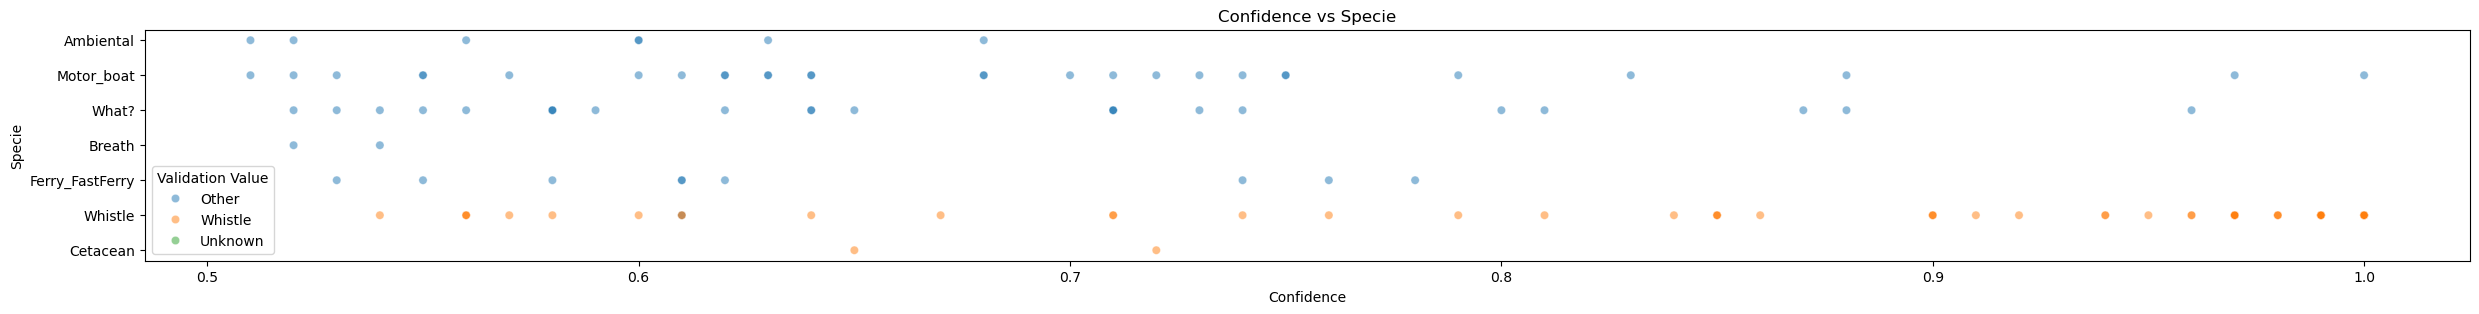

In [126]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Suggested Specie', hue="Validation Value", alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

/tmp/ipykernel_5507/4255151684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])


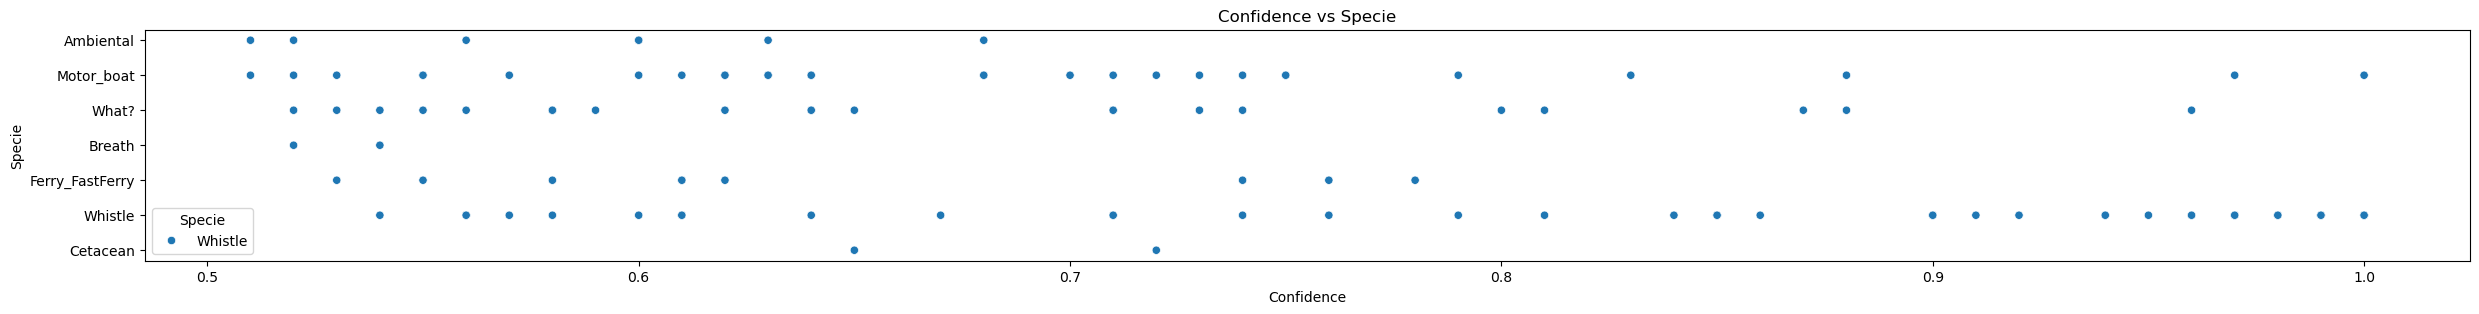

In [127]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Suggested Specie', hue="Specie", alpha=1)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

/tmp/ipykernel_5507/494332848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])
/tmp/ipykernel_5507/494332848.py:11: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Validation", alpha=0.5, palette=["C1", "C2", "C0"], s=100)


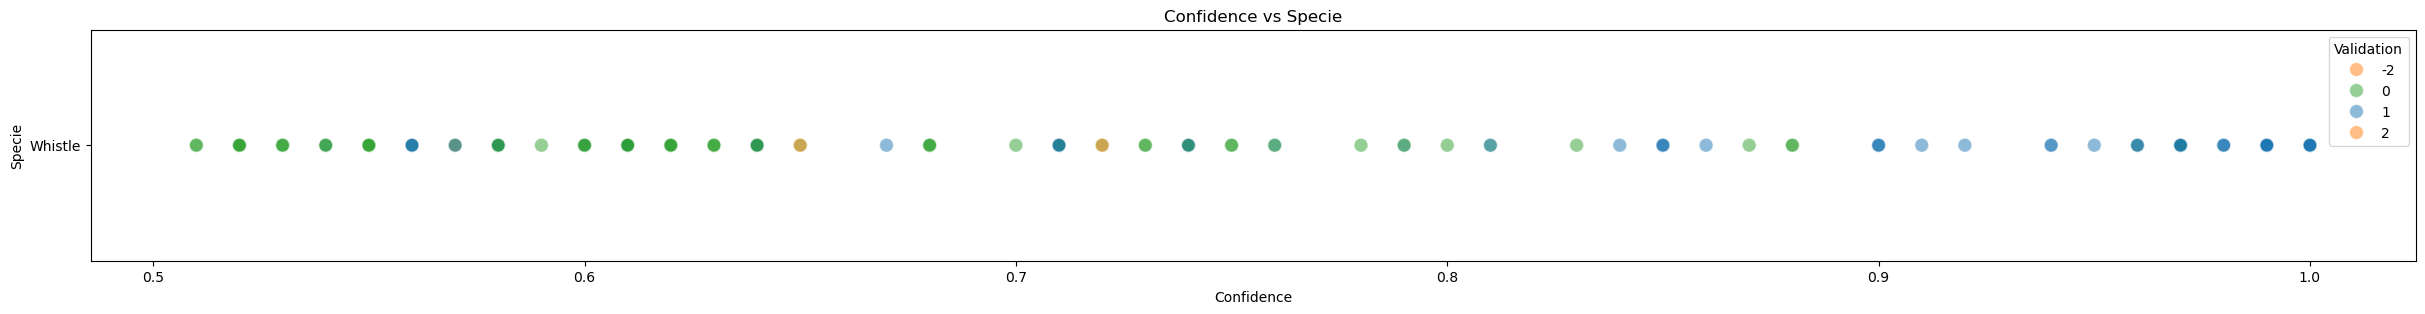

In [128]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Validation", alpha=0.5, palette=["C1", "C2", "C0"], s=100)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

In [129]:
# df_regression

In [130]:
# Logistic regression for df, set Validation to 1 if Whistle or Cetacean and 0 if Other specie or Unknown
df_regression = df.copy()
df_regression.loc[df_regression['Validation'] == 1, 'Validation'] = 1
df_regression.loc[df_regression['Validation'] == 2, 'Validation'] = 1
df_regression.loc[df_regression['Validation'] == 0, 'Validation'] = 0
df_regression.loc[df_regression['Validation'] == -2, 'Validation'] = 0
df_regression.loc[df_regression['Validation'] == -1, 'Validation'] = 0

# Drop columns that are not needed
# df_regression = df_regression.drop(columns=['Specie', 'File', 'SegmentFile', 'StartSecond', 'EndSecond', 'StartRecordingTimestamp', 'StartAnnotationTimestamp', 'EndAnnotationTimestamp', 'Suggested Specie', 'Validation Value'])

Model's probability range: 0.19 to 1.00
Threshold at 47% correctness:
- Logit Score: 1.64
- Confidence Score: 0.84
- Positives: 69
- Real Positives: 82
- True Positives: 63
- True Positives Lost: 19
- False Positives Included: 6
- False Positives not Included: 65


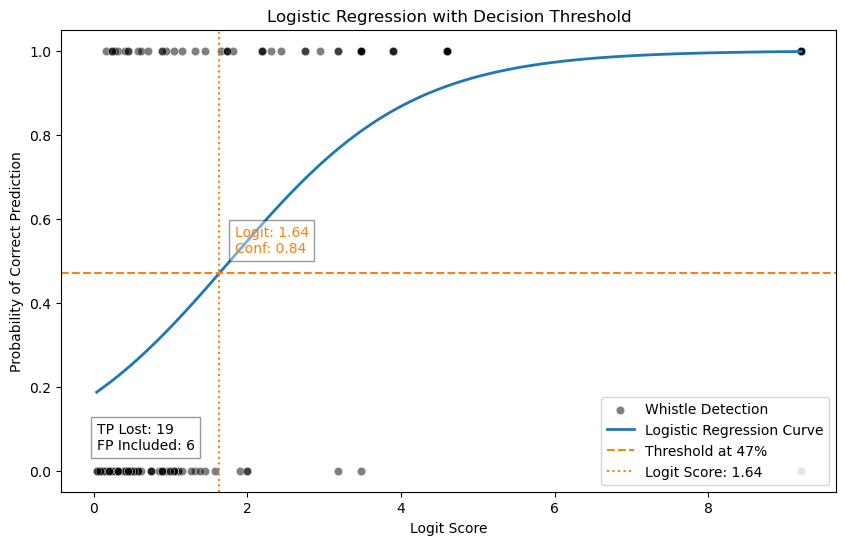

Percentage of missing positives: 0.19%


In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# 1. Fix Confidence Score to Avoid Log Errors (Clip between [0.0001, 0.9999])
df_regression["ConfidenceScore"] = np.clip(df_regression["ConfidenceScore"], 0.0001, 0.9999)

# 2. Convert Confidence Score to Logit Score
df_regression["LogitScore"] = np.round(np.log(df_regression["ConfidenceScore"] / (1 - df_regression["ConfidenceScore"])), 3)

# 3. Extract Features and Target
X = df_regression[['LogitScore']].values  # Use Logit Score as feature
y = df_regression['Validation'].values  # Target variable

# 4. Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

# 5. Generate Smooth Curve Data for Plotting
X_curve = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_curve_proba = model.predict_proba(X_curve)[:, 1]  # Probability for class 1

# 6. Check Min and Max Confidence Score from Model
min_confidence = y_curve_proba.min()
max_confidence = y_curve_proba.max()
print(f"Model's probability range: {min_confidence:.2f} to {max_confidence:.2f}")

# 7. User-defined Correctness Threshold (Y-axis value)
correctness_threshold = 0.47  # Change this value to test different thresholds

# 8. Find Logit Score for Given Probability (X-axis intersection)
logit_threshold = np.interp(correctness_threshold, y_curve_proba, X_curve.flatten())

# 9. Convert Logit Score to Confidence Score using Sigmoid Function
confidence_threshold = 1 / (1 + np.exp(-logit_threshold))

# 10. Count True Positives Lost & False Positives Included
predicted_labels = (X >= logit_threshold).astype(int).flatten()
total_positives = np.sum(y == 1)
true_positives = np.sum((predicted_labels == 1) & (y == 1))
false_positives = np.sum((predicted_labels == 1) & (y == 0))

# 11. Plot the Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, color='black', alpha=0.5, label="Whistle Detection")  # Black dots
plt.plot(X_curve, y_curve_proba, color='C0', linewidth=2, label="Logistic Regression Curve")  # Blue curve

# 12. Add Threshold Lines
plt.axhline(correctness_threshold, color='C1', linestyle='dashed', label=f"Threshold at {correctness_threshold*100:.0f}%")
plt.axvline(logit_threshold, color='C1', linestyle='dotted', label=f"Logit Score: {logit_threshold:.2f}")

# 13. Add Text Annotations on Plot
plt.text(logit_threshold + 0.2, correctness_threshold + 0.05, 
         f"Logit: {logit_threshold:.2f}\nConf: {confidence_threshold:.2f}", 
         color='C1', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

plt.text(X.min(), 0.05, 
         f"TP Lost: {total_positives - true_positives}\nFP Included: {false_positives}", 
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

# Labels and Title
plt.xlabel('Logit Score')
plt.ylabel('Probability of Correct Prediction')
plt.title('Logistic Regression with Decision Threshold')
plt.legend()

# 14. Print Threshold Details in Console
print(f"Threshold at {correctness_threshold*100:.0f}% correctness:")
print(f"- Logit Score: {logit_threshold:.2f}")
print(f"- Confidence Score: {confidence_threshold:.2f}")
print(f"- Positives: {true_positives + false_positives}")
print(f"- Real Positives: {total_positives}")
print(f"- True Positives: {true_positives}")
print(f"- True Positives Lost: {total_positives - true_positives}")
print(f"- False Positives Included: {false_positives}")
print(f"- False Positives not Included: {np.sum((predicted_labels == 0) & (y == 0))}")

plt.show()

missing_positives = ((total_positives - (true_positives + false_positives))) / (true_positives + false_positives)
print(f"Percentage of missing positives: {missing_positives:.2f}%")

Model's probability range: 0.19 to 1.00
Threshold at 40% correctness:
- Logit Score: 1.30
- Confidence Score: 0.79
- True Positives: 82
- True Positives Lost: 17
- False Positives: 71
- False Positives Included: 10
- False Positives not Included: 61


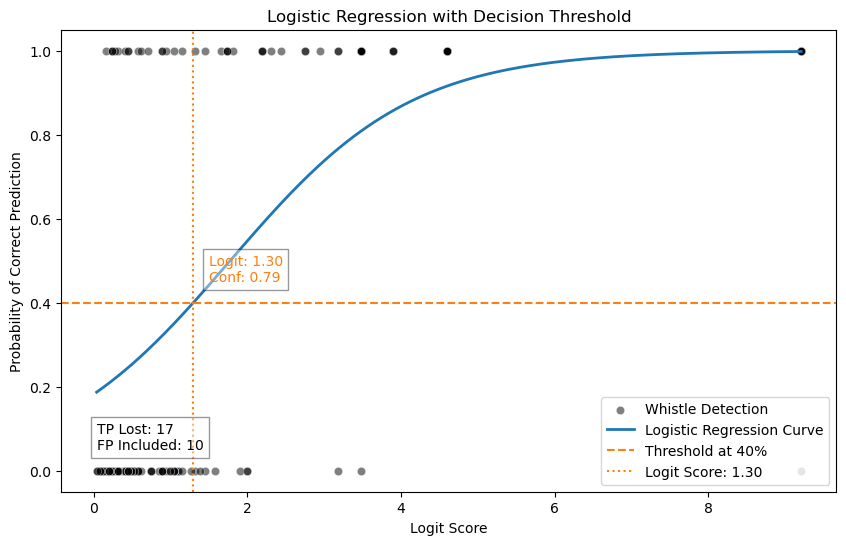

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# 1. Fix Confidence Score to Avoid Log Errors (Clip between [0.0001, 0.9999])
df_regression["ConfidenceScore"] = np.clip(df_regression["ConfidenceScore"], 0.0001, 0.9999)

# 2. Convert Confidence Score to Logit Score
df_regression["LogitScore"] = np.round(np.log(df_regression["ConfidenceScore"] / (1 - df_regression["ConfidenceScore"])), 3)

# 3. Extract Features and Target
X = df_regression[['LogitScore']].values  # Use Logit Score as feature
y = df_regression['Validation'].values  # Target variable

# 4. Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

# 5. Generate Smooth Curve Data for Plotting
X_curve = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_curve_proba = model.predict_proba(X_curve)[:, 1]  # Probability for class 1

# 6. Check Min and Max Confidence Score from Model
min_confidence = y_curve_proba.min()
max_confidence = y_curve_proba.max()
print(f"Model's probability range: {min_confidence:.2f} to {max_confidence:.2f}")

# 7. User-defined Correctness Threshold (Y-axis value)
correctness_threshold = 0.4  # Change this value to test different thresholds

# 8. Find Logit Score for Given Probability (X-axis intersection)
logit_threshold = np.interp(correctness_threshold, y_curve_proba, X_curve.flatten())

# 9. Convert Logit Score to Confidence Score using Sigmoid Function
confidence_threshold = 1 / (1 + np.exp(-logit_threshold))

# 10. Count True Positives Lost & False Positives Included
predicted_labels = (X >= logit_threshold).astype(int).flatten()
total_positives = np.sum(y == 1)
total_negatives = np.sum(y == 0)
true_positives = np.sum((predicted_labels == 1) & (y == 1))
false_positives = np.sum((predicted_labels == 1) & (y == 0))

# 11. Plot the Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, color='black', alpha=0.5, label="Whistle Detection")  # Black dots
plt.plot(X_curve, y_curve_proba, color='C0', linewidth=2, label="Logistic Regression Curve")  # Blue curve

# 12. Add Threshold Lines
plt.axhline(correctness_threshold, color='C1', linestyle='dashed', label=f"Threshold at {correctness_threshold*100:.0f}%")
plt.axvline(logit_threshold, color='C1', linestyle='dotted', label=f"Logit Score: {logit_threshold:.2f}")

# 13. Add Text Annotations on Plot
plt.text(logit_threshold + 0.2, correctness_threshold + 0.05, 
         f"Logit: {logit_threshold:.2f}\nConf: {confidence_threshold:.2f}", 
         color='C1', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

plt.text(X.min(), 0.05, 
         f"TP Lost: {total_positives - true_positives}\nFP Included: {false_positives}", 
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

# Labels and Title
plt.xlabel('Logit Score')
plt.ylabel('Probability of Correct Prediction')
plt.title('Logistic Regression with Decision Threshold')
plt.legend()

# 14. Print Threshold Details in Console
print(f"Threshold at {correctness_threshold*100:.0f}% correctness:")
print(f"- Logit Score: {logit_threshold:.2f}")
print(f"- Confidence Score: {confidence_threshold:.2f}")
print(f"- True Positives: {total_positives}")
print(f"- True Positives Lost: {total_positives - true_positives}")
print(f"- False Positives: {total_negatives}")
print(f"- False Positives Included: {false_positives}")
print(f"- False Positives not Included: {np.sum((predicted_labels == 0) & (y == 0))}")

plt.show()

In [133]:
# Show df_regression sorted by LogitScore
df_regression.sort_values(by='LogitScore', ascending=True)

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value,LogitScore
139,channelA_2024-06-11_09-57-03.WAV,channelA_2024-06-11_09-57-03_48kHz_211_218_0.5...,211.0,218.0,2024-06-11 09:57:03,2024-06-11 10:00:34,2024-06-11 10:00:41,Whistle,0,Ambiental,0.5100,Other,0.04
91,channelA_2024-05-31_18-03-05.WAV,channelA_2024-05-31_18-03-05_48kHz_256_263_0.5...,256.0,263.0,2024-05-31 18:03:05,2024-05-31 18:07:21,2024-05-31 18:07:28,Whistle,0,Motor_boat,0.5100,Other,0.04
135,channelA_2024-06-10_08-34-25.WAV,channelA_2024-06-10_08-34-25_48kHz_265_272_0.5...,265.0,272.0,2024-06-10 08:34:25,2024-06-10 08:38:50,2024-06-10 08:38:57,Whistle,0,Ambiental,0.5200,Other,0.08
120,channelA_2024-06-08_09-28-22.WAV,channelA_2024-06-08_09-28-22_48kHz_289_296_0.5...,289.0,296.0,2024-06-08 09:28:22,2024-06-08 09:33:11,2024-06-08 09:33:18,Whistle,0,What?,0.5200,Other,0.08
114,channelA_2024-06-06_23-19-31.WAV,channelA_2024-06-06_23-19-31_48kHz_49_56_0.52.WAV,49.0,56.0,2024-06-06 23:19:31,2024-06-06 23:20:20,2024-06-06 23:20:27,Whistle,0,Breath,0.5200,Other,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_166_173_1.0...,166.0,173.0,2024-05-27 21:48:19,2024-05-27 21:51:05,2024-05-27 21:51:12,Whistle,1,Whistle,0.9999,Whistle,9.21
119,channelA_2024-06-08_01-05-49.WAV,channelA_2024-06-08_01-05-49_48kHz_52_59_1.0.WAV,52.0,59.0,2024-06-08 01:05:49,2024-06-08 01:06:41,2024-06-08 01:06:48,Whistle,1,Whistle,0.9999,Whistle,9.21
7,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_124_131_1.0...,124.0,131.0,2024-05-27 21:48:19,2024-05-27 21:50:23,2024-05-27 21:50:30,Whistle,1,Whistle,0.9999,Whistle,9.21
4,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109.0,116.0,2024-05-27 21:48:19,2024-05-27 21:50:08,2024-05-27 21:50:15,Whistle,1,Whistle,0.9999,Whistle,9.21


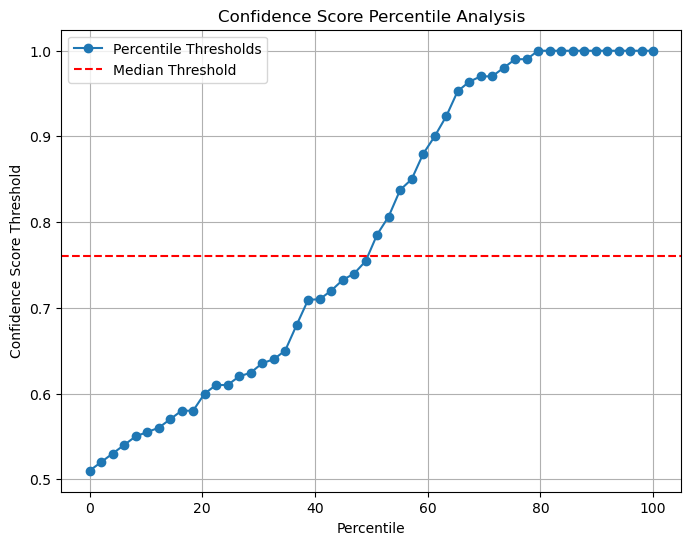

Best Confidence Score Threshold (90th Percentile): 1.00


In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract confidence scores from your regression DataFrame
confidence_scores = df_regression["ConfidenceScore"].values

# Sort confidence scores
sorted_confidence = np.sort(confidence_scores)

# Define percentiles to analyze
percentiles = np.linspace(0, 100, 50)  # 50 evenly spaced percentiles
thresholds = np.percentile(sorted_confidence, percentiles)

# Plot Confidence Score Percentile Analysis
plt.figure(figsize=(8, 6))
plt.plot(percentiles, thresholds, marker='o', linestyle='-', color='C0', label="Percentile Thresholds")
plt.xlabel('Percentile')
plt.ylabel('Confidence Score Threshold')
plt.title('Confidence Score Percentile Analysis')
plt.axhline(y=np.median(sorted_confidence), color='r', linestyle='dashed', label="Median Threshold")
plt.legend()
plt.grid()
plt.show()

# Select best threshold (e.g., 90th percentile as a decision boundary)
best_threshold = np.percentile(sorted_confidence, 90)
print(f"Best Confidence Score Threshold (90th Percentile): {best_threshold:.2f}")


Best Confidence Score Threshold: 0.84


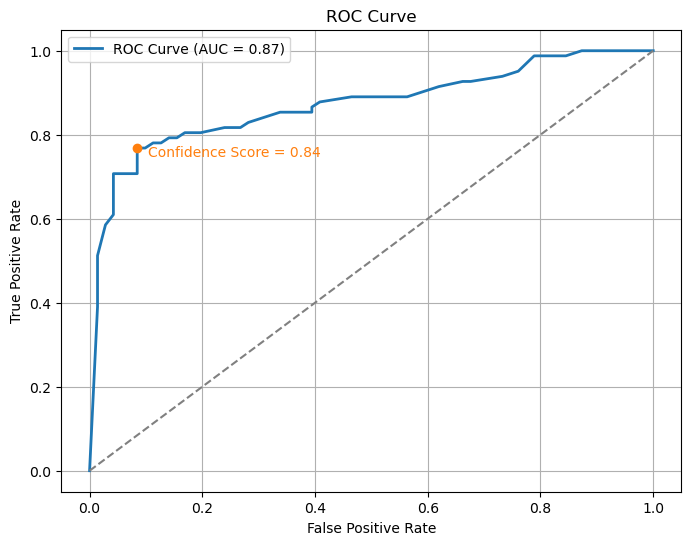

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Extract Confidence Scores & Validation Labels (1 = Correct, 0 = Incorrect)
y_true = df_regression["Validation"].values  # 1 = Correct Prediction, 0 = Incorrect Prediction
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score

# Compute ROC Curve (False Positive Rate & True Positive Rate)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)  # Compute AUC Score

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='C0', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()

# Find the Best Threshold (Closest to (0,1) on ROC Curve)
best_index = np.argmax(tpr - fpr)  # Maximize TPR - FPR
best_threshold = thresholds[best_index]

# Highlight the best threshold on the graph
plt.scatter(fpr[best_index], tpr[best_index], color='C1', label=f'Best Threshold = {best_threshold:.2f}', zorder=5)
plt.text(fpr[best_index] + 0.02, tpr[best_index] - 0.02, 
         f"Confidence Score = {best_threshold:.2f}", 
         color='C1', fontsize=10)

print(f"Best Confidence Score Threshold: {best_threshold:.2f}")

plt.show()


In [136]:
df_regression

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value,LogitScore
0,channelA_2024-05-27_21-43-19.WAV,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286.0,293.0,2024-05-27 21:43:19,2024-05-27 21:48:05,2024-05-27 21:48:12,Whistle,1,Whistle,0.5600,Whistle,0.241
1,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0.0,5.0,2024-05-27 21:48:19,2024-05-27 21:48:19,2024-05-27 21:48:24,Whistle,1,Whistle,0.9800,Whistle,3.892
2,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103.0,110.0,2024-05-27 21:48:19,2024-05-27 21:50:02,2024-05-27 21:50:09,Whistle,1,Whistle,0.9100,Whistle,2.314
3,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106.0,113.0,2024-05-27 21:48:19,2024-05-27 21:50:05,2024-05-27 21:50:12,Whistle,1,Whistle,0.9800,Whistle,3.892
4,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109.0,116.0,2024-05-27 21:48:19,2024-05-27 21:50:08,2024-05-27 21:50:15,Whistle,1,Whistle,0.9999,Whistle,9.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,channelA_2024-06-12_16-00-33.WAV,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106.0,113.0,2024-06-12 16:00:33,2024-06-12 16:02:19,2024-06-12 16:02:26,Whistle,0,Ferry_FastFerry,0.6200,Other,0.490
151,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25.0,32.0,2024-06-12 16:15:33,2024-06-12 16:15:58,2024-06-12 16:16:05,Whistle,0,Ferry_FastFerry,0.5800,Other,0.323
152,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34.0,41.0,2024-06-12 16:15:33,2024-06-12 16:16:07,2024-06-12 16:16:14,Whistle,0,Ferry_FastFerry,0.6100,Other,0.447
153,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40.0,47.0,2024-06-12 16:15:33,2024-06-12 16:16:13,2024-06-12 16:16:20,Whistle,0,Ferry_FastFerry,0.6100,Other,0.447


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve, auc

# # Extract Confidence Scores & Validation Labels (1 = Correct, 0 = Incorrect)
# y_true = df_regression["Validation"].values  # 1 = Correct Prediction, 0 = Incorrect Prediction
# y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score

# # Compute Precision and Recall
# precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# # Plot Precision-Recall Curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='C0', lw=2, label='Precision-Recall Curve')

# # Highlight the best threshold
# best_threshold_index = np.argmax(precision + recall)
# best_threshold = thresholds[best_threshold_index]
# plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='C1', label=f'Best Threshold = {best_threshold:.2f}', zorder=5)
# plt.text(recall[best_threshold_index] + 0.02, precision[best_threshold_index] - 0.02, 
#          f"Confidence\nScore = {best_threshold:.2f}", color='C1', fontsize=10)

# # Labels and Title
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Calculate AUC for Precision-Recall Curve
# pr_auc = auc(recall, precision)
# print(f"Precision-Recall AUC: {pr_auc:.2f}")
# print(f"Best Confidence Score Threshold for Precision-Recall Curve: {best_threshold:.2f}")

NameError: name 'df_regression' is not defined

In [137]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Find the index where the sum of Precision and Recall is maximized
best_threshold_index = np.argmax(precision + recall)

# Get the best threshold value
best_threshold = thresholds[best_threshold_index]

# Print out the best threshold and corresponding precision and recall values
print(f"Best Confidence Score Threshold (Max Precision + Recall): {best_threshold:.2f}")
print(f"Precision at Threshold: {precision[best_threshold_index]:.2f}")
print(f"Recall at Threshold: {recall[best_threshold_index]:.2f}")

Best Confidence Score Threshold (Max Precision + Recall): 0.84
Precision at Threshold: 0.91
Recall at Threshold: 0.77


In [147]:
df_regression

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value,LogitScore
0,channelA_2024-05-27_21-43-19.WAV,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286.0,293.0,2024-05-27 21:43:19,2024-05-27 21:48:05,2024-05-27 21:48:12,Whistle,1,Whistle,0.5600,Whistle,0.241
1,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0.0,5.0,2024-05-27 21:48:19,2024-05-27 21:48:19,2024-05-27 21:48:24,Whistle,1,Whistle,0.9800,Whistle,3.892
2,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103.0,110.0,2024-05-27 21:48:19,2024-05-27 21:50:02,2024-05-27 21:50:09,Whistle,1,Whistle,0.9100,Whistle,2.314
3,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106.0,113.0,2024-05-27 21:48:19,2024-05-27 21:50:05,2024-05-27 21:50:12,Whistle,1,Whistle,0.9800,Whistle,3.892
4,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109.0,116.0,2024-05-27 21:48:19,2024-05-27 21:50:08,2024-05-27 21:50:15,Whistle,1,Whistle,0.9999,Whistle,9.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,channelA_2024-06-12_16-00-33.WAV,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106.0,113.0,2024-06-12 16:00:33,2024-06-12 16:02:19,2024-06-12 16:02:26,Whistle,0,Ferry_FastFerry,0.6200,Other,0.490
151,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25.0,32.0,2024-06-12 16:15:33,2024-06-12 16:15:58,2024-06-12 16:16:05,Whistle,0,Ferry_FastFerry,0.5800,Other,0.323
152,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34.0,41.0,2024-06-12 16:15:33,2024-06-12 16:16:07,2024-06-12 16:16:14,Whistle,0,Ferry_FastFerry,0.6100,Other,0.447
153,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40.0,47.0,2024-06-12 16:15:33,2024-06-12 16:16:13,2024-06-12 16:16:20,Whistle,0,Ferry_FastFerry,0.6100,Other,0.447


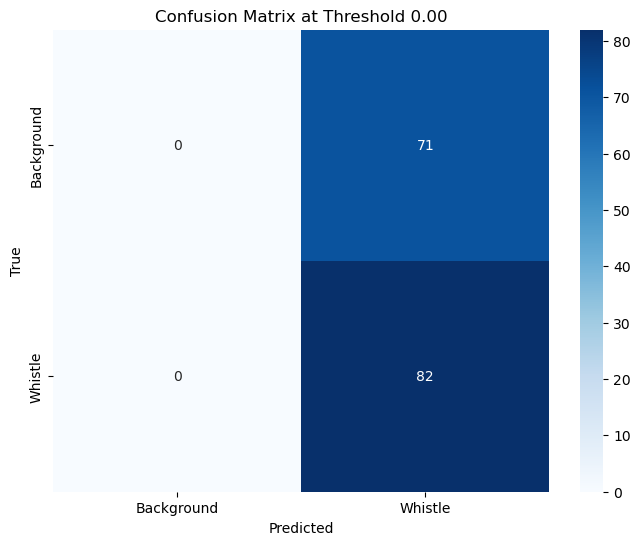

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.54      1.00      0.70        82

    accuracy                           0.54       153
   macro avg       0.27      0.50      0.35       153
weighted avg       0.29      0.54      0.37       153



/home/gruncrow/anaconda3/envs/DataAnalysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gruncrow/anaconda3/envs/DataAnalysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gruncrow/anaconda3/envs/DataAnalysis/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [153]:
# Calculate all metrics for confidence score threshold 0.84
from sklearn.metrics import confusion_matrix, classification_report
# Set the threshold
threshold = 0

# Convert y_true to binary: 1 for 'Whistle', 0 for all others
y_true = (df_regression["Validation Value"] == "Whistle").astype(int).values
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score
# Predict labels based on the threshold
predicted_labels = (y_scores >= threshold).astype(int)
# Calculate confusion matrix
cm = confusion_matrix(y_true, predicted_labels)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Background', 'Whistle'], yticklabels=['Background', 'Whistle'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix at Threshold {threshold:.2f}')
plt.show()

# Calculate classification report
print(classification_report(y_true, predicted_labels))

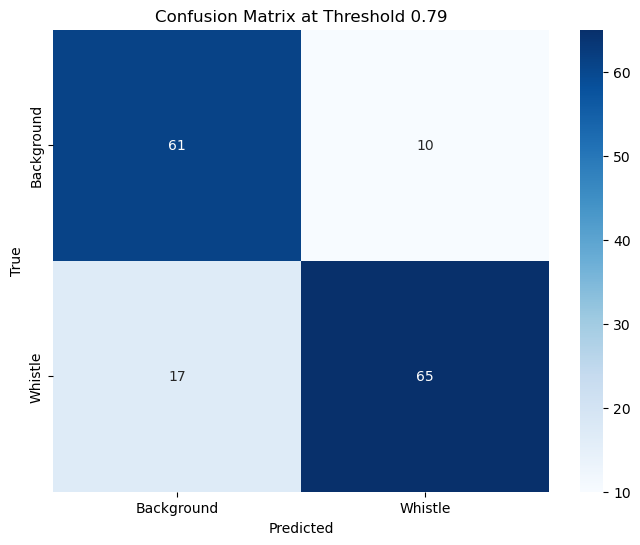

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        71
           1       0.87      0.79      0.83        82

    accuracy                           0.82       153
   macro avg       0.82      0.83      0.82       153
weighted avg       0.83      0.82      0.82       153



In [154]:
# Calculate all metrics for confidence score threshold 0.84
from sklearn.metrics import confusion_matrix, classification_report
# Set the threshold
threshold = 0.79

# Convert y_true to binary: 1 for 'Whistle', 0 for all others
y_true = (df_regression["Validation Value"] == "Whistle").astype(int).values
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score
# Predict labels based on the threshold
predicted_labels = (y_scores >= threshold).astype(int)
# Calculate confusion matrix
cm = confusion_matrix(y_true, predicted_labels)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Background', 'Whistle'], yticklabels=['Background', 'Whistle'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix at Threshold {threshold:.2f}')
plt.show()

# Calculate classification report
print(classification_report(y_true, predicted_labels))

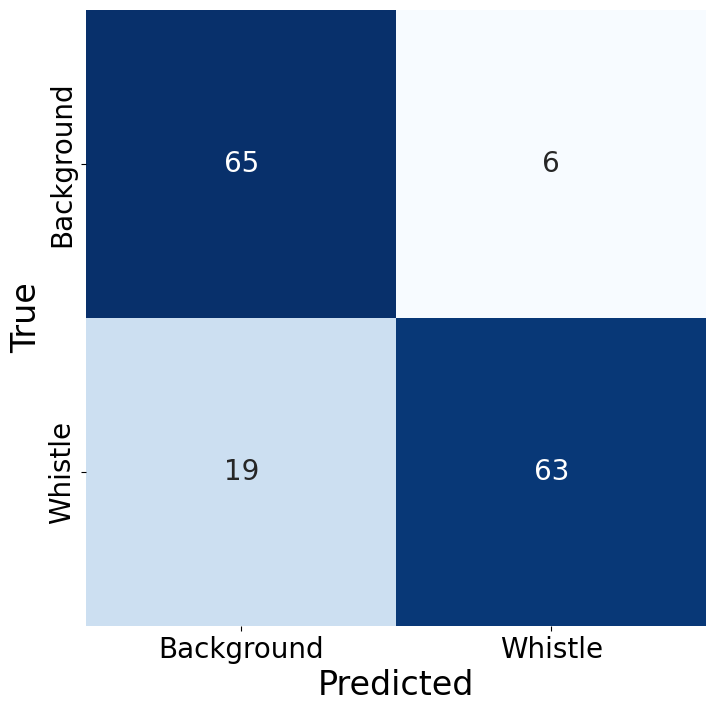

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        71
           1       0.91      0.77      0.83        82

    accuracy                           0.84       153
   macro avg       0.84      0.84      0.84       153
weighted avg       0.85      0.84      0.84       153



In [165]:
# Calculate all metrics for confidence score threshold 0.84
from sklearn.metrics import confusion_matrix, classification_report
# Set the threshold
threshold = 0.84

# Convert y_true to binary: 1 for 'Whistle', 0 for all others
y_true = (df_regression["Validation Value"] == "Whistle").astype(int).values
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score
# Predict labels based on the threshold
predicted_labels = (y_scores >= threshold).astype(int)
# Calculate confusion matrix
cm = confusion_matrix(y_true, predicted_labels)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Background', 'Whistle'],
    yticklabels=['Background', 'Whistle'],
    cbar=False,
    annot_kws={"size": 20}  # Make numbers bigger
)
plt.xlabel('Predicted', fontsize=24)
plt.ylabel('True', fontsize=24)
# plt.title(f'Confusion Matrix at Threshold {threshold:.2f}', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("../../../Figures/Deployment1_confusion_matrix_threshold_{:.2f}.pdf".format(threshold))
plt.show()

# Calculate classification report
print(classification_report(y_true, predicted_labels))